<a href="https://colab.research.google.com/github/Adelson021/Proj01/blob/main/Mod07_Tarefa_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
# Carregar a base de dados
df = pd.read_csv('base_transformada.csv', sep=',')

In [ ]:
df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,True,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,True,False,False,False,True,False,False,False,False


In [ ]:
df.dtypes

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
sexo_M                                       bool
posse_de_veiculo_Y                           bool
posse_de_imovel_Y                            bool
tipo_renda_Pensioner                         bool
tipo_renda_State servant                     bool
tipo_renda_Student                           bool
tipo_renda_Working                           bool
educacao_Higher education                    bool
educacao_Incomplete higher                   bool
educacao_Lower secondary                     bool
educacao_Secondary / secondary special       bool


In [ ]:
df.isnull().sum()

qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
sexo_M                                    0
posse_de_veiculo_Y                        0
posse_de_imovel_Y                         0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Married                      0
estado_civil_Separated                    0
estado_civil_Single / not marrie

In [ ]:
# Preencher valores ausentes ou remover linhas com valores ausentes
df = df.dropna()
df

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,True,True,False,False,False,True,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,True,False,False,True,False,True,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,True,False,False,False,True,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,False,...,True,False,False,False,False,True,False,False,False,False
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,False,...,True,True,False,False,False,True,False,False,False,False
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,True,True,False,False,False,True,False,False,False,False
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,True,...,True,True,False,False,False,True,False,False,False,False


In [ ]:
#df_dummies = pd.get_dummies(df, columns=['mau', 'estado_civil_Separated'], drop_first=True)
#df_dummies

In [ ]:
# Definir a variável resposta (y) e as variáveis explicativas (X)
y = df['mau']
X = df.drop('mau', axis=1)

In [ ]:
# Separar os dados em conjuntos de treinamento e validação (70% treinamento, 30% validação)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=100)

In [ ]:
print(f'Tamanho do conjunto de treinamento: {X_train.shape}')
print(f'Tamanho do conjunto de validação: {X_val.shape}')

Tamanho do conjunto de treinamento: (11655, 28)
Tamanho do conjunto de validação: (4995, 28)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [ ]:
# Definir o modelo de árvore de decisão
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [ ]:
# Treinar o modelo com os dados de treinamento
clf = clf.fit(X,y)
clf

DecisionTreeClassifier(random_state=100)

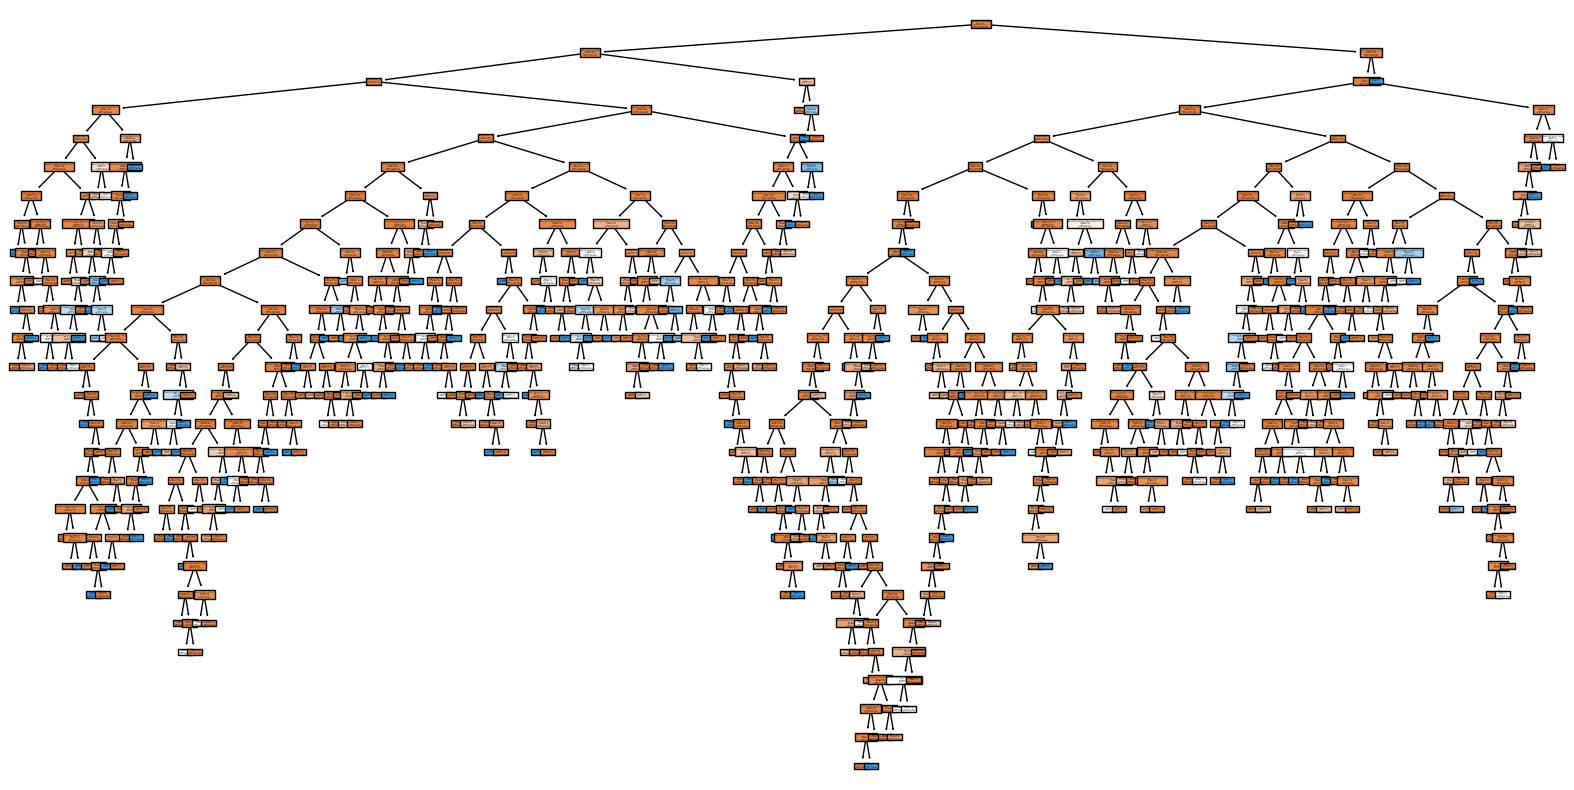

In [ ]:
# Visualizar a árvore de decisão
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["aprovados", "reprovados"])
plt.show()

In [ ]:
# Fazer previsões no conjunto de treinamento
y_train_pred = clf.predict(X_train)

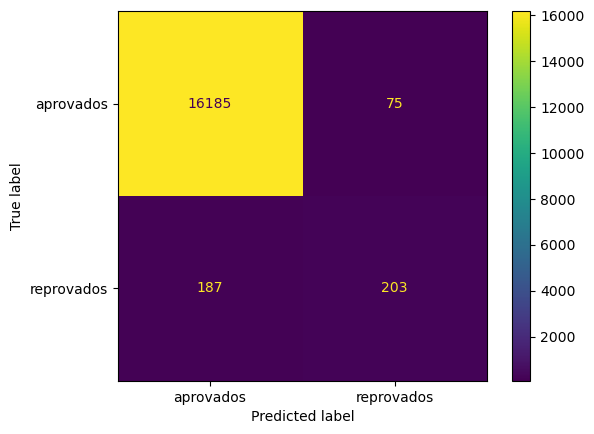

In [ ]:
# Produzir a matriz de confusão
cm = confusion_matrix(y, clf.predict(X), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])

MatrizDeConfusao.plot();

In [ ]:
# Calcular a acurácia na base de treinamento
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Acurácia na base de treinamento: {accuracy_train:.2f}')

Acurácia na base de treinamento: 0.99


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [ ]:
# Fazer previsões no conjunto de validação
y_val_pred = clf.predict(X_val)

In [ ]:
# Calcular a acurácia na base de validação
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f'Acurácia na base de treinamento: {accuracy_train:.2f}')
print(f'Acurácia na base de validação: {accuracy_val:.2f}')

Acurácia na base de treinamento: 0.99
Acurácia na base de validação: 0.97


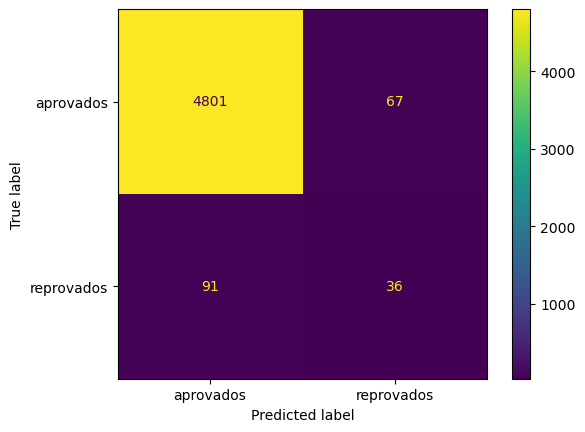

In [ ]:
# Produzir a matriz de confusão para a base de validação
cm = confusion_matrix(y_val, clf.predict(X_val), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])

MatrizDeConfusao.plot();

In [ ]:
# Definir o novo modelo de árvore de decisão com parâmetros ajustados
new_decision_tree = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
new_decision_tree

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [ ]:
# Treinar o novo modelo com os dados de treinamento
new_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [ ]:
# Fazer previsões no conjunto de validação com o novo modelo
y_val_pred_new = new_decision_tree.predict(X_val)

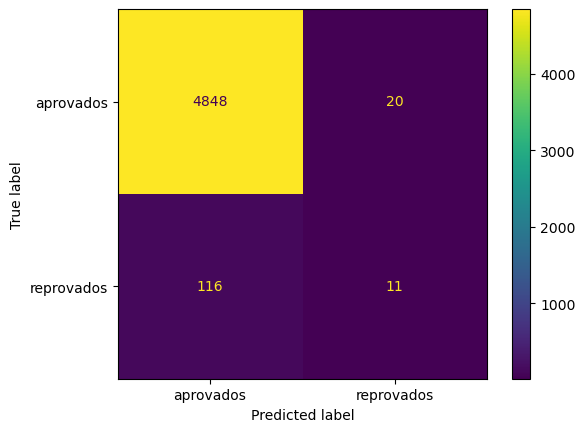

In [ ]:
# Produzir a matriz de confusão para a nova árvore na base de validação
cm = confusion_matrix(y_val, new_decision_tree.predict(X_val), labels=new_decision_tree.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['aprovados', 'reprovados'])

MatrizDeConfusao.plot();

In [ ]:
# Calcular a acurácia na base de validação com a nova árvore
accuracy_val_new = accuracy_score(y_val, y_val_pred_new)
print(f'Acurácia na base de validação com a nova árvore: {accuracy_val_new:.2f}')

Acurácia na base de validação com a nova árvore: 0.97


In [ ]:
# Calcular a proporção de proponentes classificados como 'maus'
proporcao_maus = (y_val_pred_new == 0).mean()
print(f'Proporção de proponentes classificados como "maus": {proporcao_maus:.2f}')

Proporção de proponentes classificados como "maus": 0.99


In [ ]:
# Classificar todos os contratos como 'bons'
y_val_all_good = [1] * len(y_val)

In [ ]:
# Calcular a acurácia dessa classificação
accuracy_all_good = accuracy_score(y_val, y_val_all_good)
print(f'Acurácia classificando todos os contratos como "bons": {accuracy_all_good:.2f}')

Acurácia classificando todos os contratos como "bons": 0.03
